# Linear regression (GD,NAG, ADAM)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.stats import bernoulli

## Load the data

In [2]:
data = load_boston()

## Play with the data

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(data.data.shape)
print(data.data)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(data.target.shape)
print(data.target)

(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.


In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


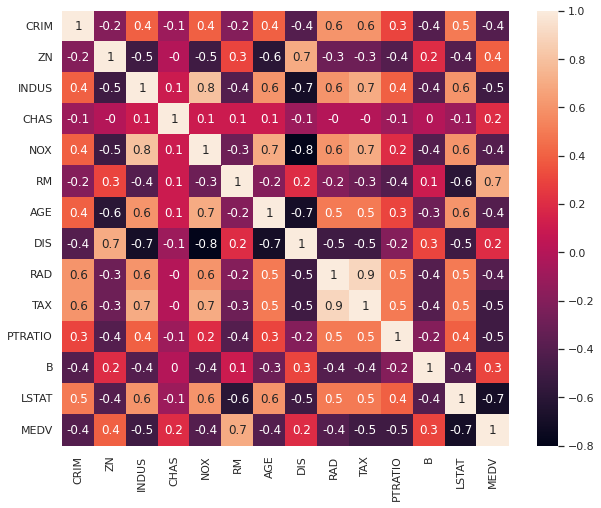

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data= df.corr().round(1) , annot=True);

In [11]:
X = df[['RM']].values
y = np.expand_dims(df['MEDV'].values, axis=1) 

## Prepare the data

In [12]:
X_train,  y_train = X, y

In [13]:
X_train.shape, y_train.shape

((506, 1), (506, 1))

##  Build the model

In [14]:
def linear_regression_GD(X, y , alpha, epochs):
    
    w = np.random.rand(X.shape[0], 1)
    b = np.random.rand(1)[0]
    m = X.shape[1]
    
    loss = []
    for i in range(epochs):
      
      z = w.T @ X + b
      yhat = z
      
      dz = yhat - y

      dw = (1.0/m) * ( X @ dz.T )
      db = (1.0/m) * np.sum(dz)

      w = w - alpha*dw
      b = b - alpha*db

      loss.append( (1.0/m)*np.sum((dz**2)) )  
      
    return {
        'w':w,
        'b':b,
        'loss':loss
        }

In [15]:
def linear_regression_NAG(X, y, eta, lr, epochs):
    
    w = np.random.rand(X.shape[0], 1)
    b = np.random.rand(1)[0]
    m = X.shape[1]
    dw_old = np.zeros( (X.shape[0],1) )
    db_old = 0.0

    loss = []
    # IMPLEMENT YOUR CODE
    for i in range(epochs):
      # At current point, move with old direction
      pre_w = w - lr*dw_old
      pre_b = b - lr*db_old

      # Pre-gradient
      z = pre_w.T @ X + pre_b
      yhat = z
      dz = yhat - y

      # Compute gradiente at new point and correct direction
      dw = (1.0/m) * ( X @ dz.T )
      pw = dw + eta*dw_old

      db = (1.0/m) * np.sum(dz)
      pb = db + eta*db_old

      # Update weights
      w = w - lr*pw
      b = b - lr*pb

      # Update olds
      dw_old = dw
      db_old = db

      loss.append( (1.0/m)*np.sum((dz**2)) ) 

    return {
        'w':w,
        'b':b,
        'loss':loss
        }

In [16]:
def linear_regression_ADAM(X, y, etav, etas, epsilon, lr, epochs):
    
    m = X.shape[1]

    w = np.random.rand(X.shape[0], 1)
    v_w = np.zeros( (X.shape[0],1) )
    s_w = np.zeros( (X.shape[0],1) )
    
    b = np.random.rand(1)[0]
    v_b = 0.0
    s_b = 0.0
    
    loss = []
    # IMPLEMENT YOUR CODE
    for i in range( epochs ):
      # Compute pre-gradient
      z = w.T @ X + b
      yhat = z
      dz = yhat - y

      # Update w
      dw = (1.0/m) * ( X @ dz.T )
      v_w = etav * v_w + (1.0 - etav) * dw
      s_w = etas*s_w + (1.0 - etas) * dw**2
      v_w_hat = ( 1.0  / (1.0 - etav**(i+1)) )* v_w
      s_w_hat = ( 1.0  / (1.0 - etas**(i+1)) )* s_w
      w = w - ( lr / (epsilon + s_w_hat**0.5) )*v_w_hat

      # Update b
      db = (1.0/m) * np.sum(dz)
      v_b = etav * v_b + (1.0 - etav) * db
      s_b = etas*s_b + (1.0 - etas) * db**2
      v_b_hat = ( 1.0  / (1.0 - etav**(i+1)) )* v_b
      s_b_hat = ( 1.0  / (1.0 - etas**(i+1)) )* s_b
      b = b - ( lr / (epsilon + s_b_hat**0.5) )*v_b_hat
      
      loss.append( (1.0/m)*np.sum((dz**2)) ) 
      
    return {
        'w':w,
        'b':b,
        'loss':loss
        }

## Train the model

In [30]:
result_GD = linear_regression_GD(X= X_train.T, y= y_train.T, alpha= 0.01, epochs=5000 )
print(result_GD['loss'][-1])

48.209437790150986


In [31]:
result_NAG = linear_regression_NAG(X= X_train.T, y= y_train.T, eta= 0.9, lr= 0.01, epochs=5000 )
print(result_NAG['loss'][-1])

45.16230356469498


In [38]:
result_ADAM = linear_regression_ADAM(X=X_train.T, y= y_train.T, etav= 0.9, etas=0.999, epsilon=1e-7, lr=0.5, epochs=1000)
print(result_ADAM['loss'][-1])

43.644177255341305


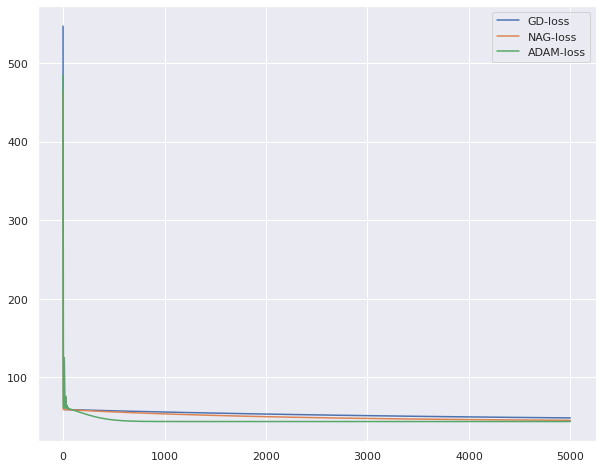

In [20]:
plt.plot(result_GD['loss'], label='GD-loss')
plt.plot(result_NAG['loss'], label='NAG-loss')
plt.plot(result_ADAM['loss'], label='ADAM-loss')
plt.legend()

## Evaluate the model

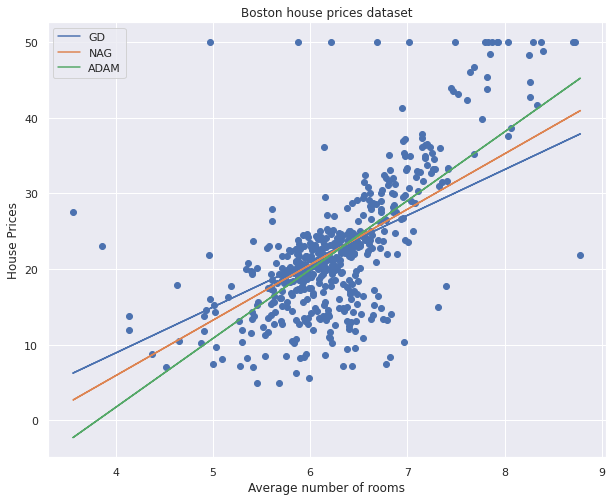

In [21]:
y_hat_GD = result_GD['w'].T@X.T + result_GD['b']
y_hat_NAG = result_NAG['w'].T@X.T + result_NAG['b']
y_hat_ADAM = result_ADAM['w'].T@X.T + result_ADAM['b']

plt.scatter(X, y)
plt.plot(X.T[0,:], y_hat_GD[0,:], label='GD')
plt.plot(X.T[0,:], y_hat_NAG[0,:], label='NAG')
plt.plot(X.T[0,:], y_hat_ADAM[0,:], label='ADAM')

plt.xlabel('Average number of rooms')
plt.ylabel('House Prices')
plt.title('Boston house prices dataset')
plt.legend()

In [22]:
print(result_GD['w'])
print(result_GD['b'])

[[6.05879133]]
-15.311718062774764


In [23]:
print(result_NAG['w'])
print(result_NAG['b'])

[[7.32948151]]
-23.394728240548293


In [24]:
print(result_ADAM['w'])
print(result_ADAM['b'])

[[9.10210898]]
-34.67062077643856
